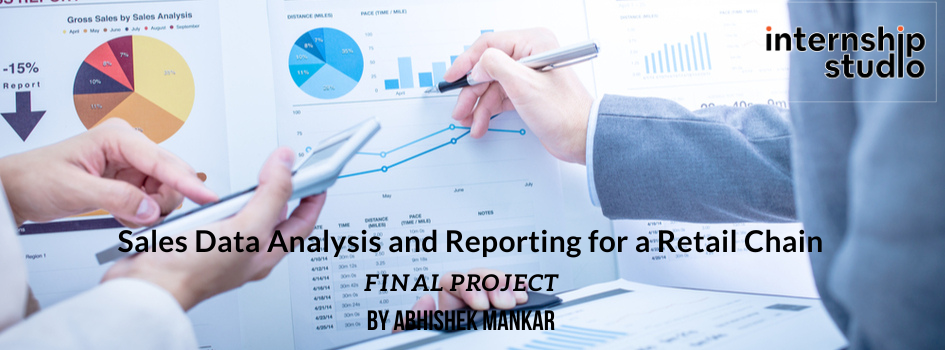

# Sales Data Analysis and Reporting for a Retail Chain

InternshipStudio is assigned the task to identify the key insights and The aim of this project is to use Python, SQL, Excel and Power bi to analyze sales data and generate meaningful reports for a retail chain team.


## Data Cleaning and Preparation

In [1]:
#Installing/Import libraries
import pandas as pd

In [2]:
#Load the data
txrn = pd.read_csv('Retail_Data_Transactions.csv')
txrn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [14]:
#Merging both the tables
df = txrn.merge(response, on='customer_id', how= 'left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [15]:
#Features/Inspenction of the data
df.dtypes
df.shape
df.head()
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [16]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [18]:
df.shape

(125000, 4)

In [19]:
pd.isnull(df)

,customer_id,trans_date,tran_amount,response
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
124995,False,False,False,False
124996,False,False,False,False
124997,False,False,False,False
124998,False,False,False,False


In [20]:
#HANDLING MISSING VALUES/Identifying missing data
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [21]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [22]:
df.columns

Index(['customer_id', 'trans_date', 'tran_amount', 'response'], dtype='object')

In [37]:
# used describe() for specific columns
df[['month', 'response', 'tran_amount']].describe()

,month,response,tran_amount
count,124969.000000,124969.000000,124969.000000
mean,6.631725,0.110763,64.995143
std,3.475188,0.313840,22.860059
min,1.000000,0.000000,10.000000
25%,4.000000,0.000000,47.000000
50%,7.000000,0.000000,65.000000
75%,10.000000,0.000000,83.000000
max,12.000000,1.000000,105.000000


In [24]:
#Removing rows with missing values
df = df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [28]:
#Change Data Types
df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')

C:\Users\Abhishek Mankar\AppData\Local\Temp\ipykernel_10324\478776881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Abhishek Mankar\AppData\Local\Temp\ipykernel_10324\478776881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']= df['response'].astype('int64')


In [26]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [27]:
set(df['response'])

{0, 1}

In [29]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [30]:
df['tran_amount'].std()

22.860058562401992

In [31]:
df['tran_amount'].sum()

8122378

In [32]:
df['tran_amount'].mean()

64.99514279541326

In [33]:
#check for outliers
#Z-score

from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold = 3

outliers= z_scores>threshold

print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [34]:
#check for outliers
#Z-score

from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['response']))

#set a threshold

threshold = 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


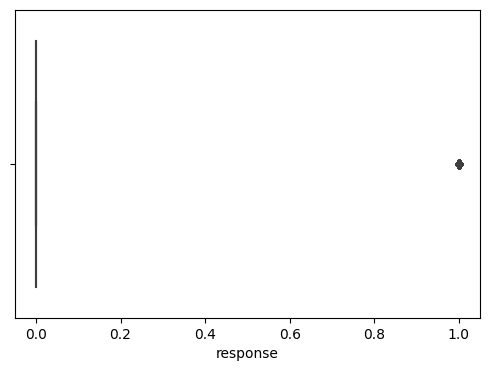

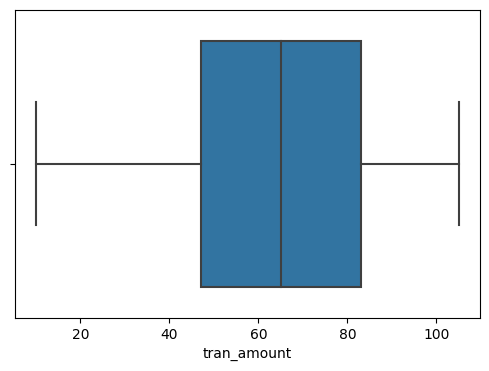

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['response'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tran_amount'])
plt.show()

In [36]:
#Creating new Columns
df['month'] = df['trans_date'].dt.month
df

C:\Users\Abhishek Mankar\AppData\Local\Temp\ipykernel_10324\624705199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [21]:
#Daily Sales
daily_sales = df.groupby(['customer_id', 'trans_date'])['tran_amount'].sum().reset_index()
daily_sales

,customer_id,trans_date,tran_amount
0,CS1112,2011-06-15,56
1,CS1112,2011-08-19,96
2,CS1112,2011-10-02,60
3,CS1112,2012-04-08,56
4,CS1112,2012-06-24,52
...,...,...,...
124172,CS9000,2014-01-12,16
124173,CS9000,2014-05-08,20
124174,CS9000,2014-07-08,26
124175,CS9000,2014-08-24,35


In [38]:
#Weekly Sales 
weekly_sales = df.set_index('trans_date').resample('W')['tran_amount'].sum().reset_index()
weekly_sales

,trans_date,tran_amount
0,2011-05-22,40319
1,2011-05-29,45925
2,2011-06-05,43315
3,2011-06-12,40455
4,2011-06-19,37942
...,...,...
196,2015-02-22,42779
197,2015-03-01,39998
198,2015-03-08,43725
199,2015-03-15,39698


In [39]:
#which 3 months have had the highest transaction amount?
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [40]:
#customer having highest number of orders.
customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts.columns= ['customer_id','counts']
customer_counts

#top 5 customers
top_5_cust = customer_counts.sort_values(by='counts', ascending = False).head(5)
top_5_cust

,customer_id,counts
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='counts'>

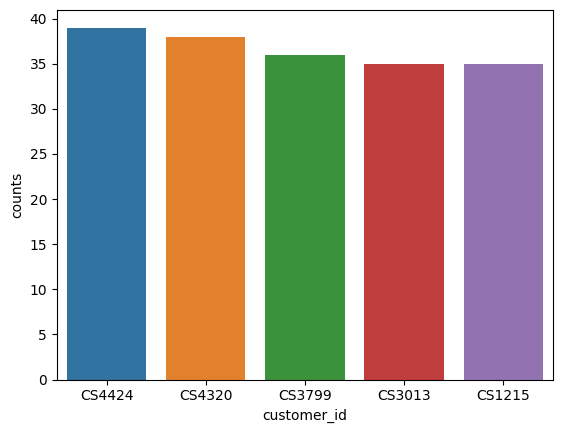

In [41]:
#barplot
sns.barplot(x='customer_id', y='counts',data=top_5_cust)

In [72]:
#customer having highest value of orders.

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#top 5 customers

top_5_sal = customer_sales.sort_values(by='tran_amount', ascending = False).head(5)
top_5_sal


,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


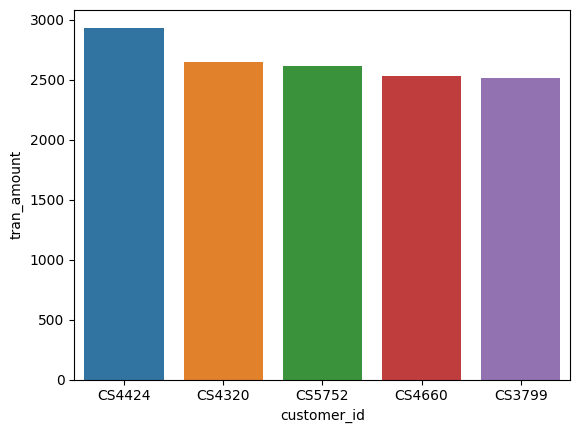

<Figure size 700x100 with 0 Axes>

In [43]:
#barplot

sns.barplot(x='customer_id', y='tran_amount', data= top_5_sal)
plt.figure(figsize=(7,1))
plt.show()


# Data Analysis

### Advanced Analytics 

### Time Series Analysis

C:\Users\Abhishek Mankar\AppData\Local\Temp\ipykernel_10324\945943426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


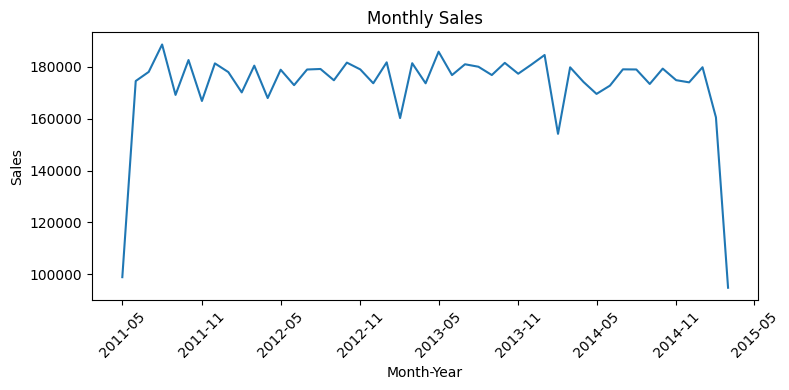

In [45]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title("Monthly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [46]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


### Cohort Segmentation

In [48]:
#Recency
recency = df.groupby('customer_id')['trans_date'].max()
recency

# Sorted the data by customer_id and trans_date
data_sorted = df.sort_values(['customer_id', 'trans_date'])
data_sorted

## Calculate recency for each customer
data_sorted['recency'] = data_sorted.groupby('customer_id')['trans_date'].diff().dt.days
data_sorted

#frequncy
frequncy = df.groupby('customer_id')['trans_date'].count()
frequncy

#Monetary (CMV) 
monetary = df.groupby('customer_id')['tran_amount'].sum()
monetary

#combine
rfm= pd.DataFrame({'recency':recency,'frequency':frequncy,'monetary':monetary})
rfm


,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [49]:
#customer segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['Segment']= rfm.apply(segment_customer, axis=1)

In [50]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [51]:
set(rfm['Segment'])

{'P0', 'P2'}

### Churn Analysis 

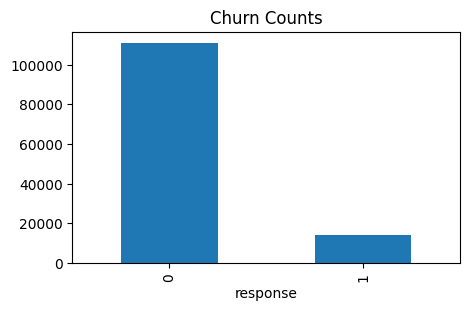

In [52]:
# Set the size of the plot
plt.figure(figsize=(5, 3))

#Count the numbers of churned and active customers
churn_counts = df['response'].value_counts()

#Plot
churn_counts.plot(kind='bar')
plt.xlabel('response')
plt.title('Churn Counts')
# Show the plot
plt.show()


### Analyzing Top Customers 

<Axes: xlabel='month_year'>

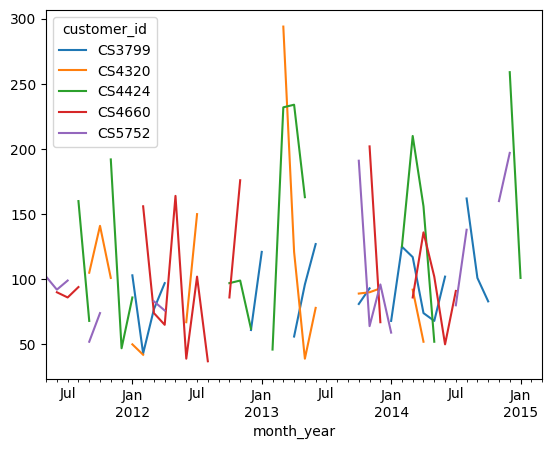

In [53]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

array([[<Axes: title={'center': 'trans_date'}>,
        <Axes: title={'center': 'tran_amount'}>],
       [<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

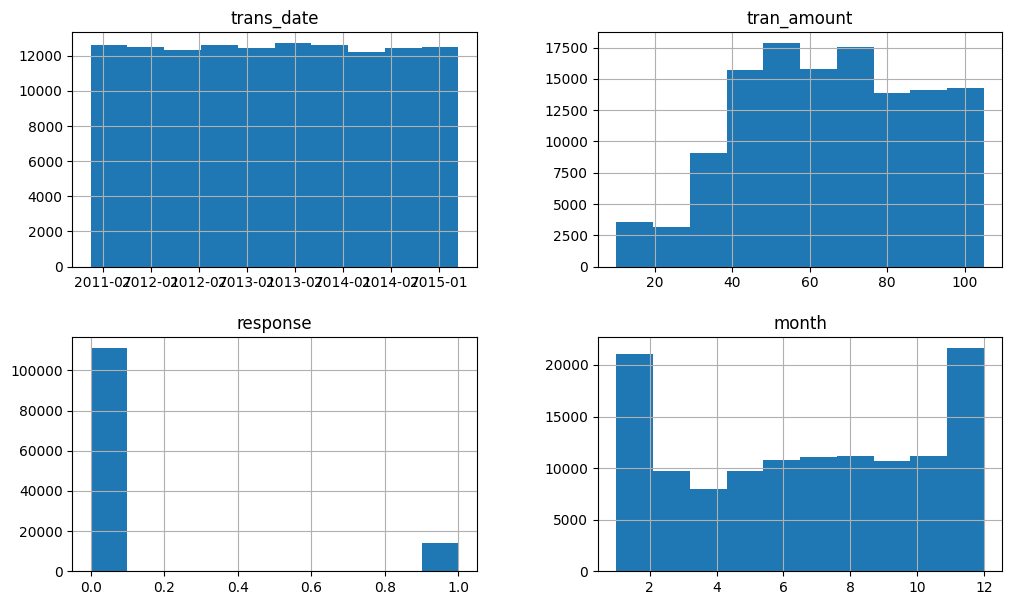

In [54]:
#Analysis using hist plot

import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(12,7))

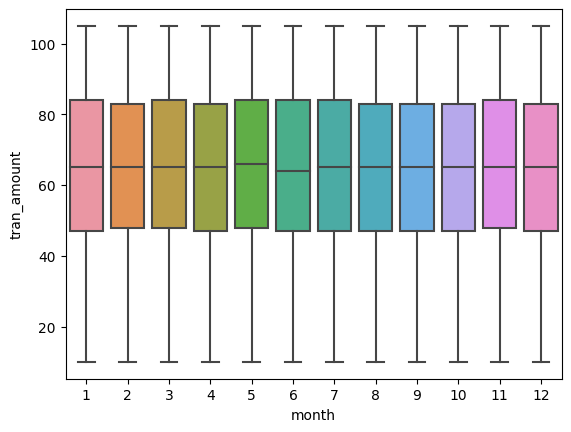

<Figure size 300x100 with 0 Axes>

In [55]:
import seaborn as sns

sns.boxplot(x="month", y="tran_amount", data=df)
plt.figure(figsize=(3, 1))
plt.show()

In [57]:
#Monthly Response
pd.crosstab(df['month'],df['response'])

response,0,1
month,,
1,9951,1193
2,8953,984
3,8695,1056
4,7012,961
5,8589,1099
6,9548,1208
7,9795,1238
8,9878,1317
9,9457,1228


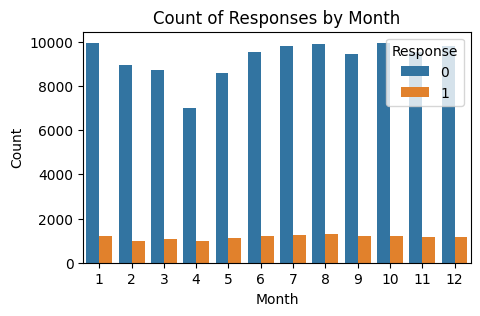

In [58]:
plt.figure(figsize=(5, 3))
sns.countplot(x="month", hue="response", data=df)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count of Responses by Month")
plt.legend(title="Response", loc="upper right")
plt.show()

<Figure size 100x200 with 0 Axes>

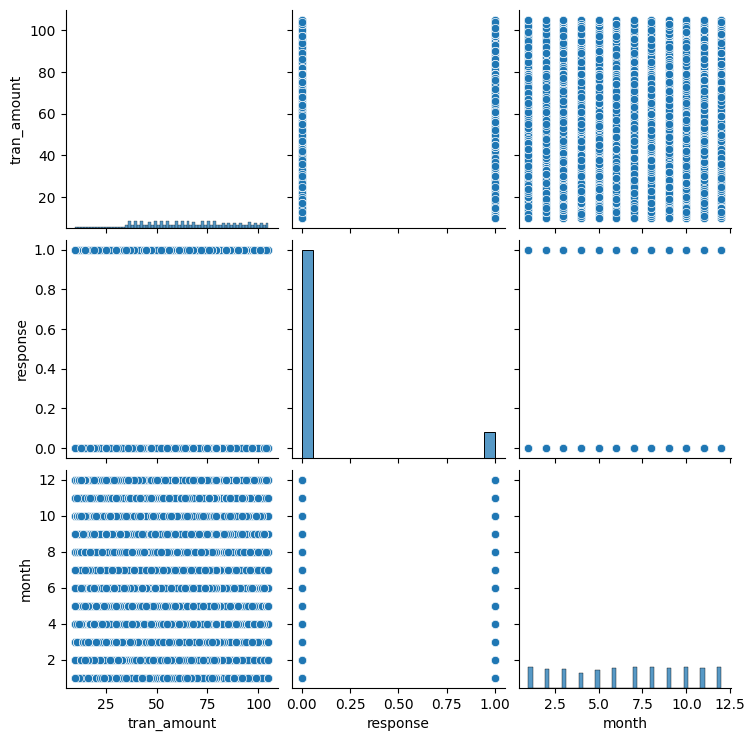

In [59]:
plt.figure(figsize=(1, 2))
sns.pairplot(df)

C:\Users\Abhishek Mankar\AppData\Local\Temp\ipykernel_10324\276880328.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tran_amount'])


<Axes: title={'center': 'Transaction amount by density'}, xlabel='tran_amount', ylabel='Density'>

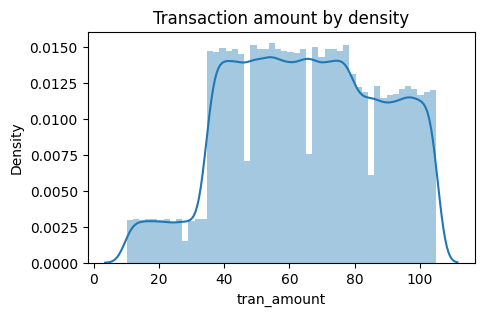

In [60]:
plt.figure(figsize=(5, 3))
plt.title("Transaction amount by density")
sns.distplot(df['tran_amount'])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

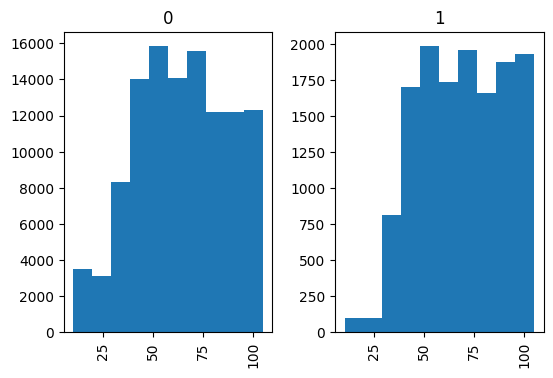

In [61]:
df.hist(by='response',column = 'tran_amount',figsize=(6,4))

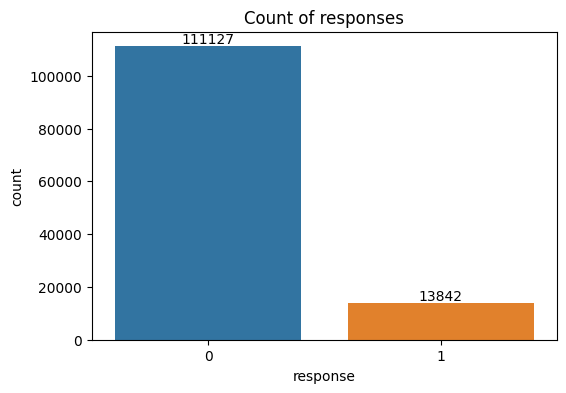

In [62]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize=(6, 4))
plt.title("Count of responses")
ax = sns.countplot(x ='response', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

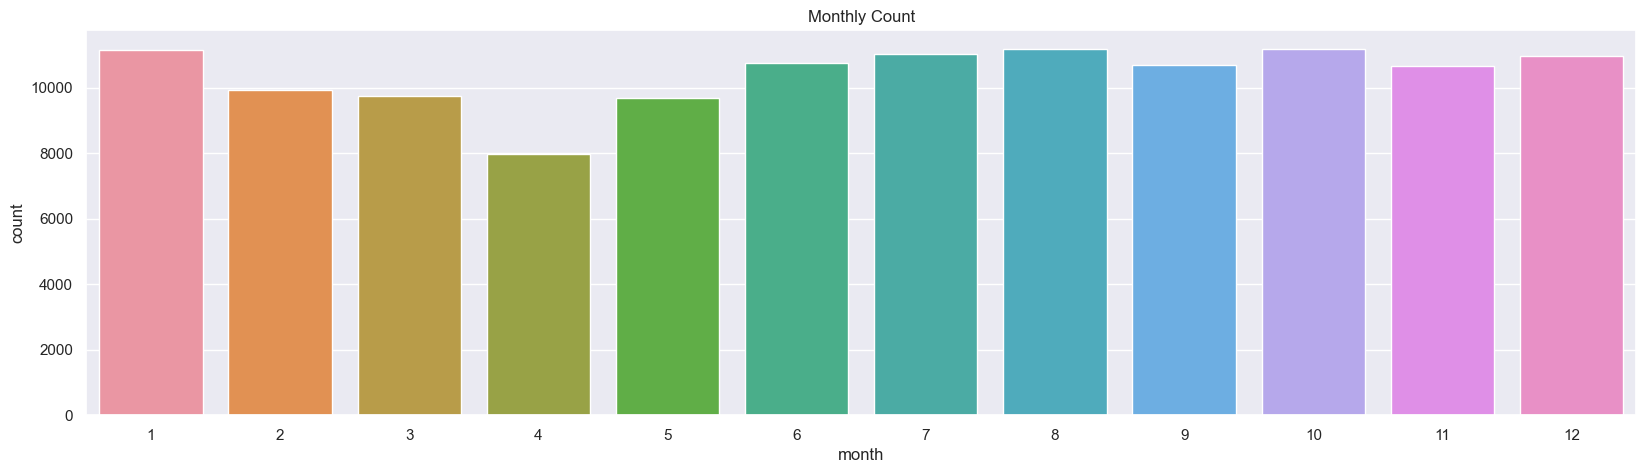

In [64]:
plt.title("Monthly Count")
sns.set(rc={'figure.figsize':(20,9)})
ax = sns.countplot(data = df, x = 'month')
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='month_year'>

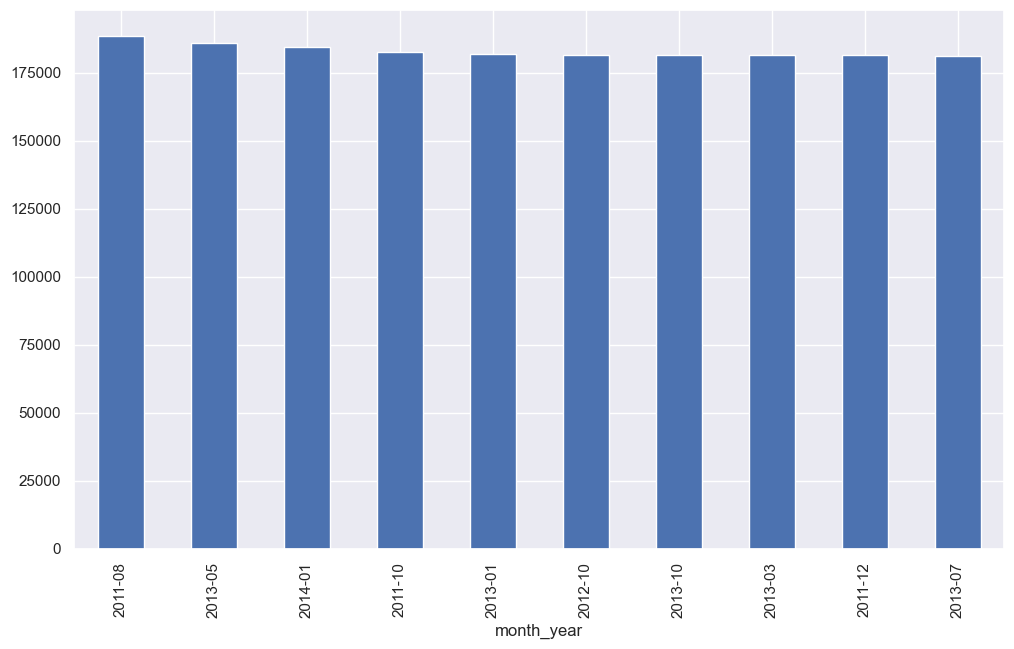

In [65]:
# top 10 most sales months

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('month_year')['tran_amount'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

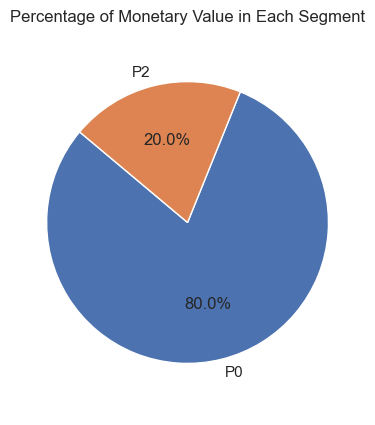

In [77]:
#Total Sum of monetary distribution by segment

monetarypie = [6498293,1624085]
segment = ['P0','P2']

plt.figure(figsize=(4, 5))
plt.pie(monetarypie, labels=segment, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Monetary Value in Each Segment')
plt.axis('equal')
plt.show()

In [152]:
df.to_csv('MainData2.csv')

In [153]:
rfm.to_csv('AddAnalysis.csv')

### Thank you!